#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [1]:
# **Dataset Credits**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data 

# # Released under MIT License

# #Copyright (c) 2013 Mark Otto.

# #Copyright (c) 2017 Andrew Fong.)

**Import Necessary Libraries**

In [2]:
# Importing all necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Task 1: Data Preparation and Exploration

1. Import the data from the `country_data.csv` file into a pandas DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to obtain the complete statistics for each feature.
5. Visualize the distribution of `child_mort, income, and gdpp` using histograms.
6. Create pairplots to visualize relationships between features.


In [3]:
# Import the dataset
df = pd.read_csv("country_data.csv")

# Display the number of rows and columns
print("Number of rows and columns:", df.shape)

# Display the first few rows of the dataset in DataFrame format
print("First few rows of the dataset:")
df.head()


Number of rows and columns: (167, 10)
First few rows of the dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Basic statistics for each feature.
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


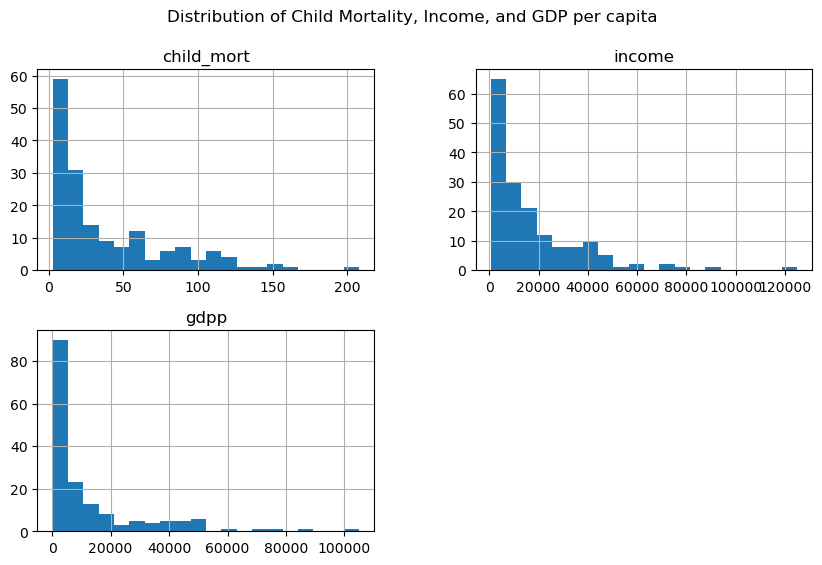

In [5]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Child Mortality, Income, and GDP per capita')
plt.show()

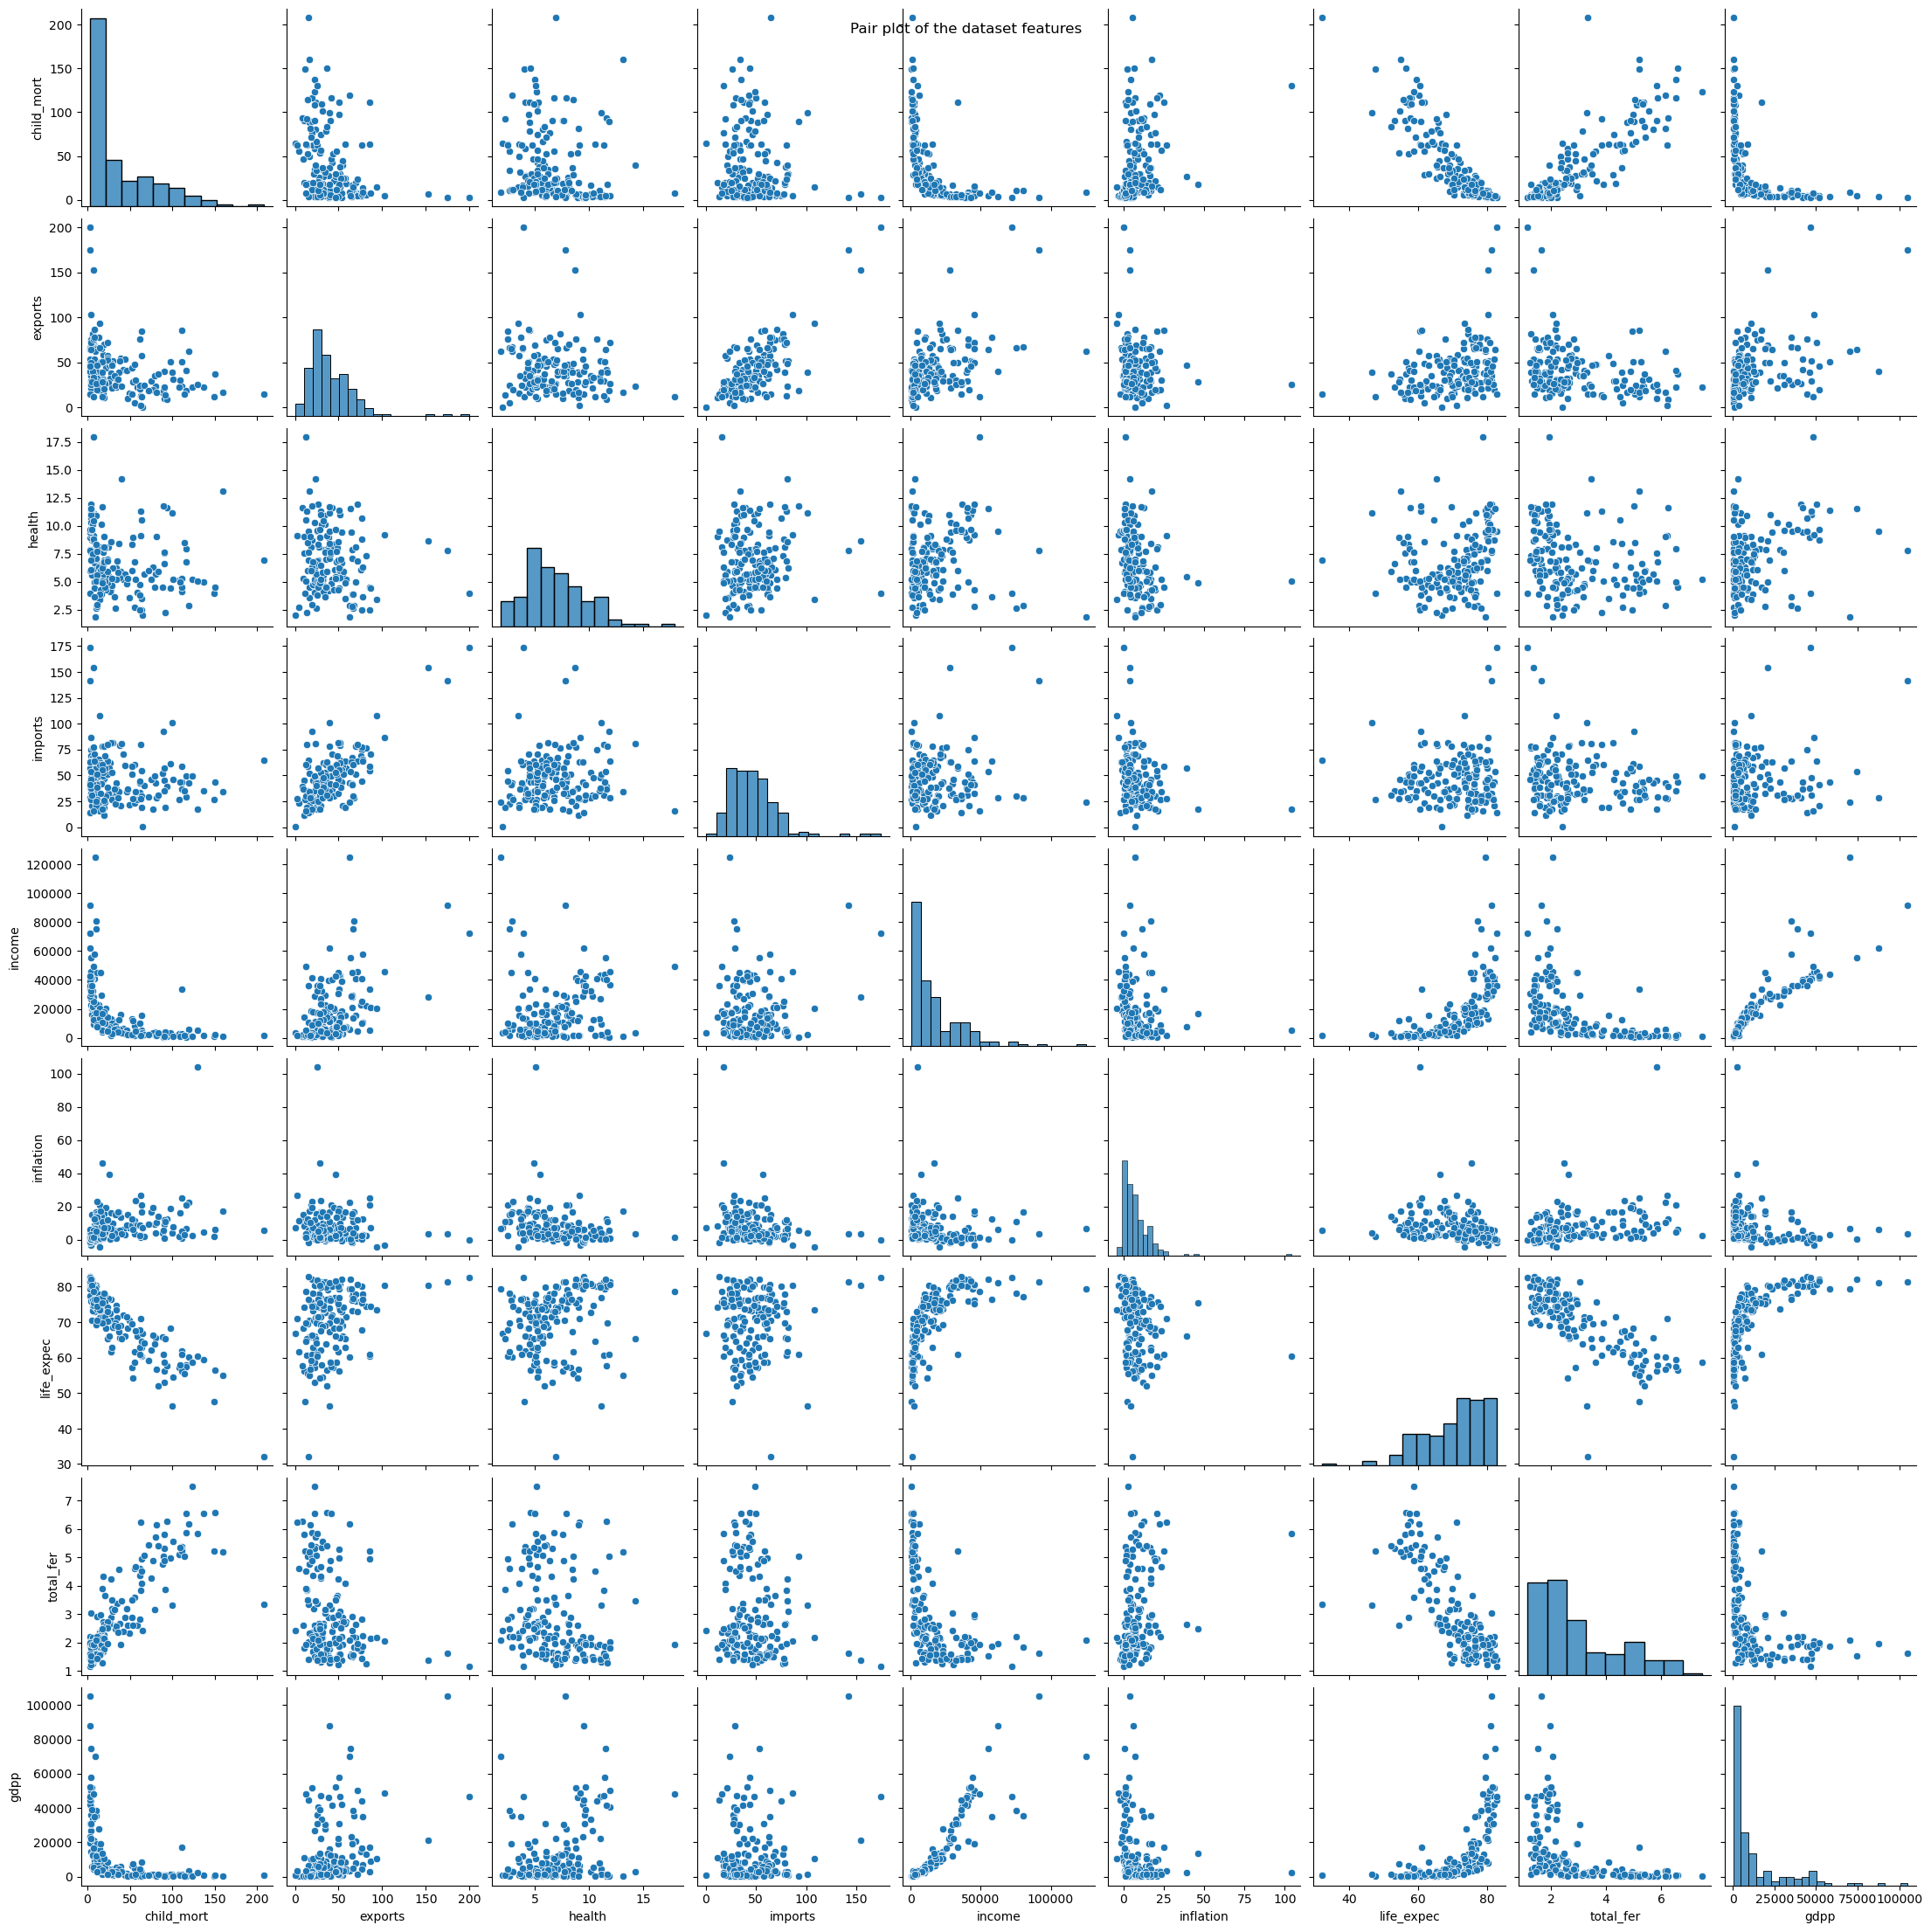

In [6]:
# Create pairplots to visualize relationships between features.
sns.pairplot(df)
plt.suptitle('Pair plot of the dataset features')
plt.show()

### Task 2: Initial K-means Clustering

1. Drop the `'country'` column since it's not a numerical feature and we can't use it for clustering. Perform this step in a new DataFrame called `'df_cluster1'`.
2. Use StandardScaler to standardize the numerical features in 'df_cluster1', ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.
3. Apply K-Means clustering to the standardized data in 'df_cluster1' with an initial number of clusters (e.g., 4).
4. Print the inertia and centroids obtained from the KMeans model to understand the clustering performance.
5. Add the cluster labels to the original DataFrame 'df'.
6. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [7]:
# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)


# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])


#check few rows
df_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [8]:
# Perform KMeans clustering with n_clusters as 4
km = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])


KMeans(n_clusters=4, random_state=42)

In [9]:
#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)

Inertia 751.1915754969667
**************************************************
Centroids
[[-3.93281964e-01 -3.05837468e-02 -2.06179028e-01  1.95624679e-02
  -2.50930209e-01 -5.78314552e-03  2.26762439e-01 -4.02578619e-01
  -3.55832254e-01]
 [-8.27448664e-01  6.45079846e-01  7.27411220e-01  1.90638952e-01
   1.48424268e+00 -4.84920644e-01  1.07957853e+00 -7.91876866e-01
   1.61599536e+00]
 [ 1.39384127e+00 -4.54868650e-01 -1.77681122e-01 -1.66445221e-01
  -7.09742585e-01  2.00563083e-01 -1.30073355e+00  1.39120898e+00
  -6.13461880e-01]
 [ 2.28138502e+00 -5.78451631e-01 -6.37438082e-01 -1.22178479e+00
  -6.24064774e-01  9.12971806e+00 -1.13412081e+00  1.91613337e+00
  -5.81936274e-01]]


In [10]:
# Add the cluster labels to the original DataFrame 'df'.

df['Cluster'] = km.labels_
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


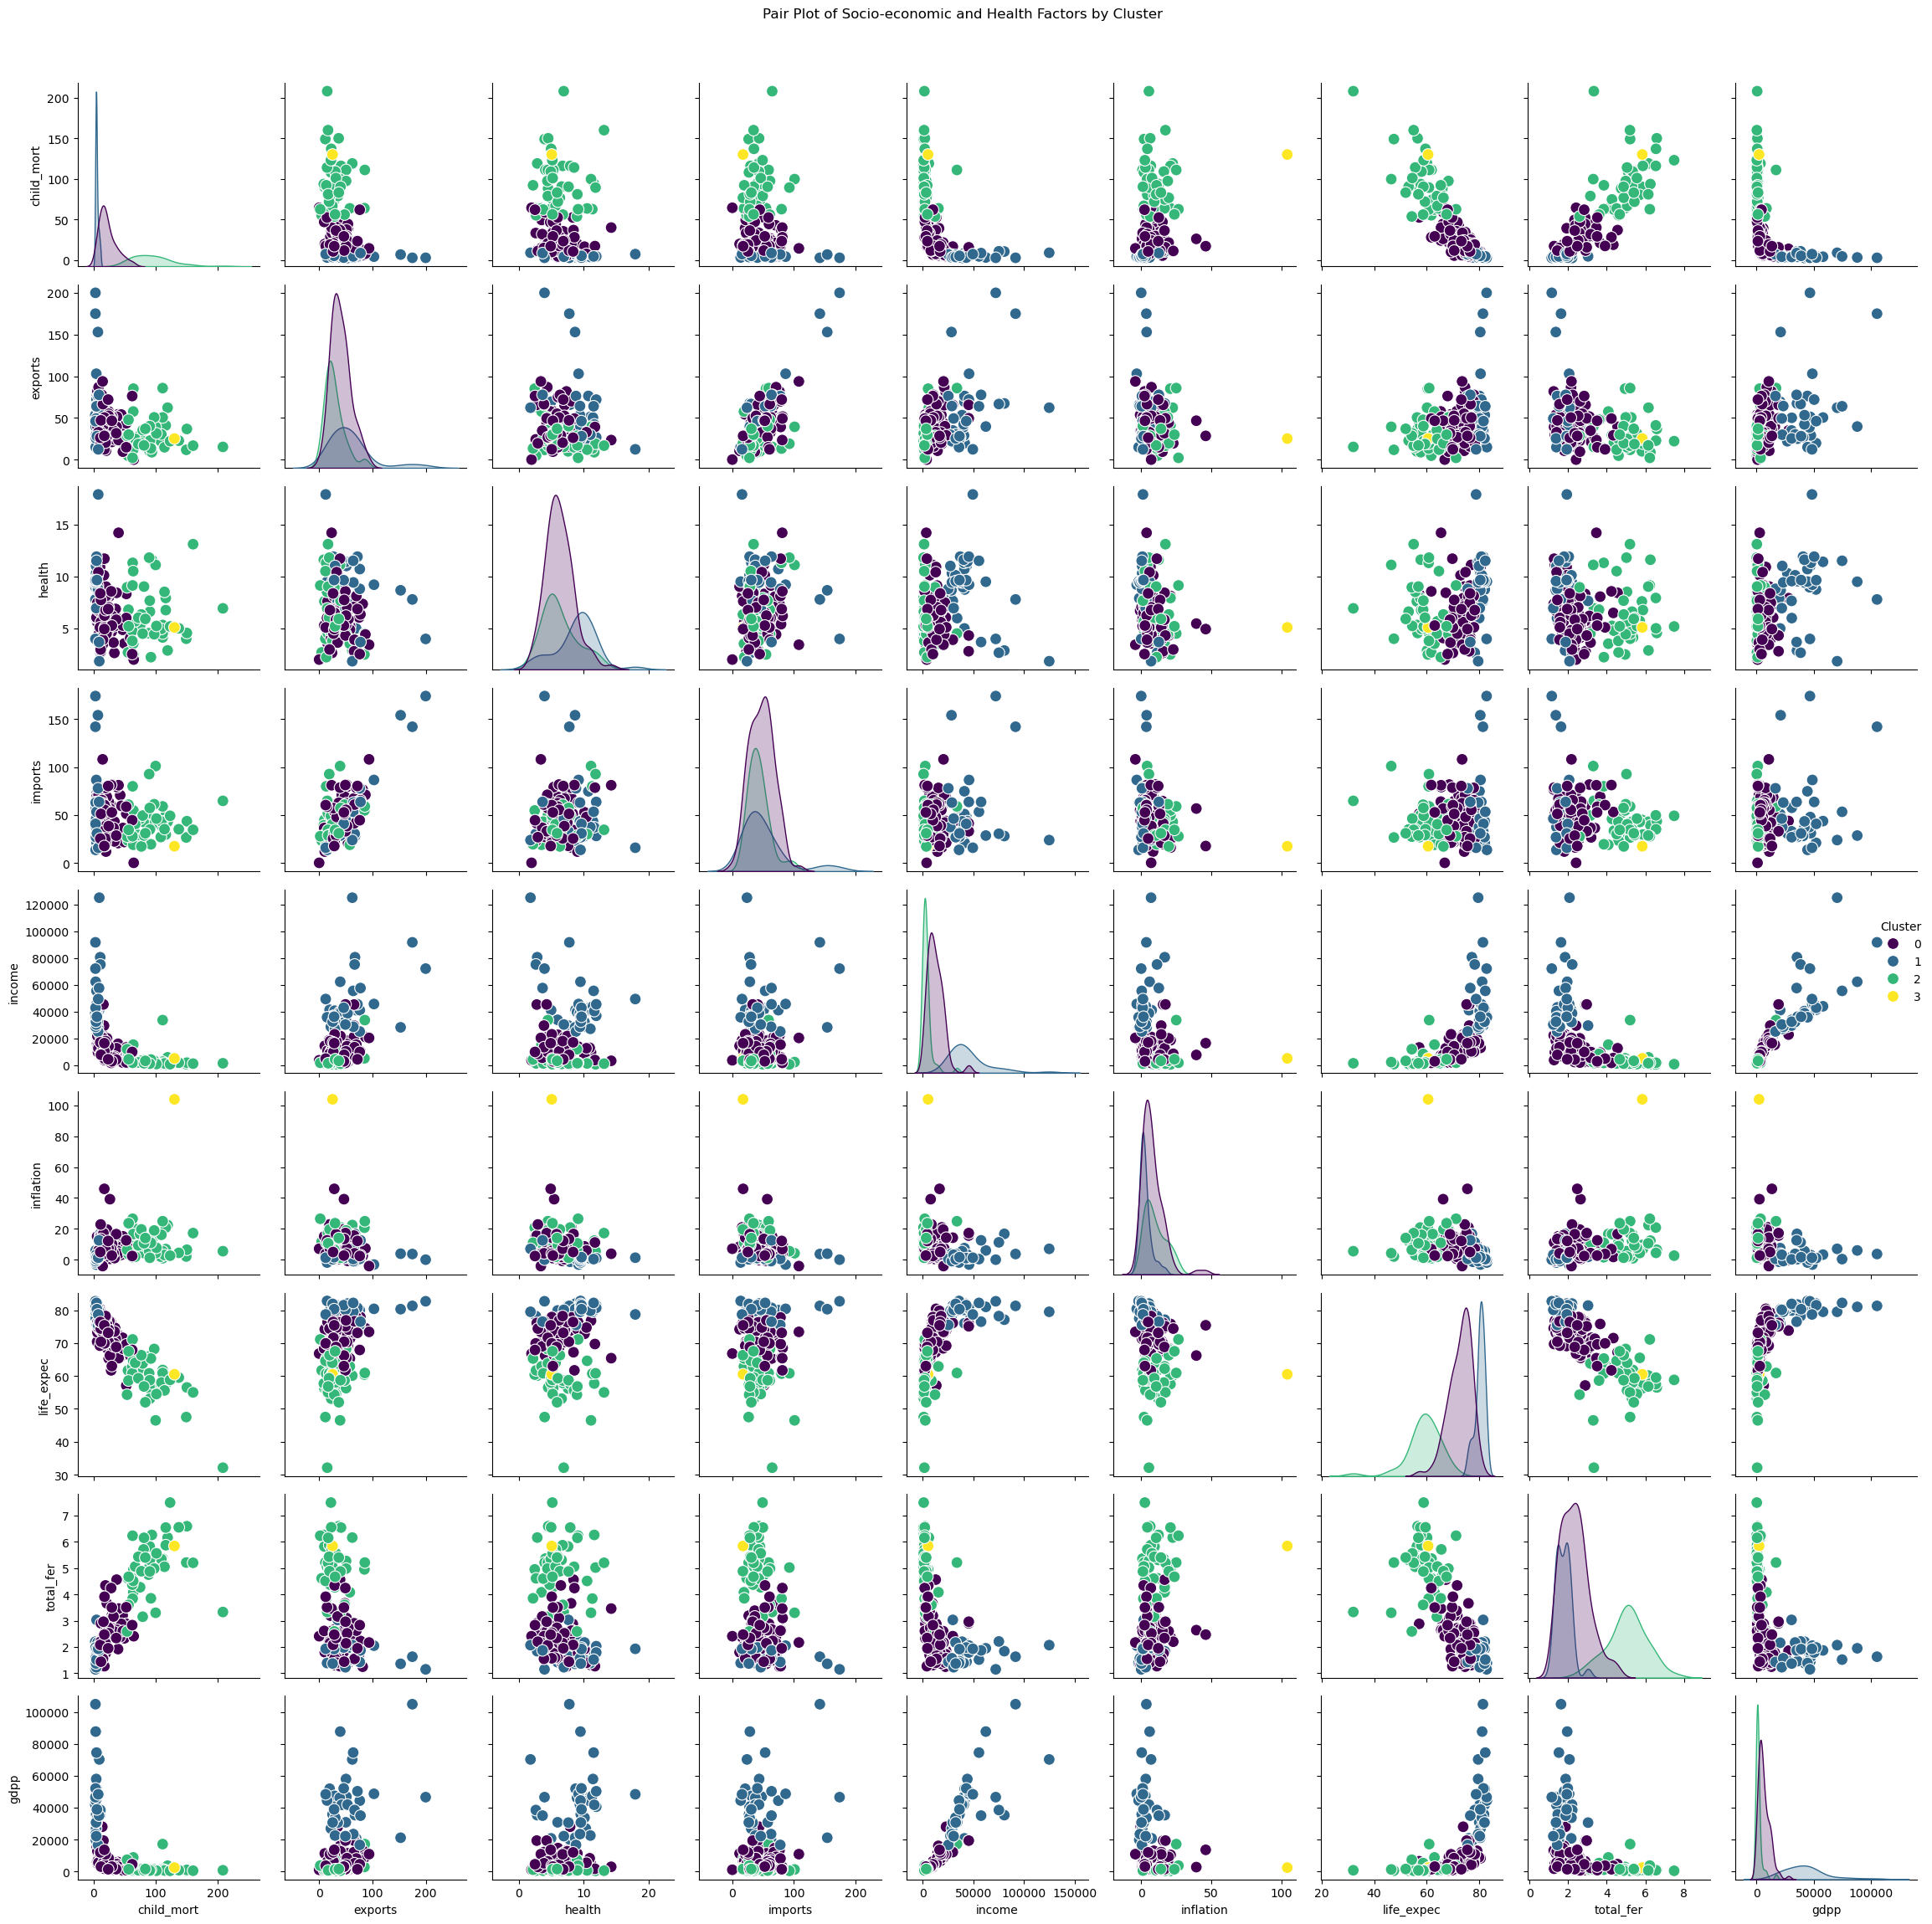

In [11]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

pair_plot = sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
pair_plot.fig.suptitle('Pair Plot of Socio-economic and Health Factors by Cluster', y=1.02)
pair_plot.fig.tight_layout()
plt.show()

### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.

[1063.4825600467796, 831.5351582151588, 751.1915754969667, 620.3621532663788, 563.5602864947639, 496.26960047809547, 490.8008362745423, 455.0170220483582, 433.53844084848174]


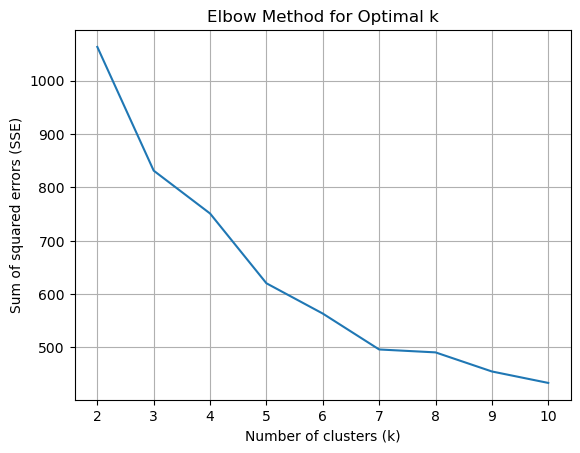

In [12]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_rng = range(2, 11)
for k in k_rng:
    km = KMeans(n_clusters=k,init='k-means++', random_state=42)
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

# Plot the Elbow Method graph
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

- Based on the Elbow Method graph, the optimal number of clusters appears to be 6. This is indicated by the point where the reduction in the sum of squared errors (SSE) starts to diminish significantly, forming an "elbow" shape. 

In [13]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.

# Perform KMeans clustering withh optimal n_clusters
km = KMeans(n_clusters=6, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

#assigning the cluster values
df['Cluster'] = km.labels_

In [14]:
#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)

Inertia 576.7839900389037
**************************************************
Centroids
[[-0.84496627 -0.01385085  1.35024763 -0.35805569  1.20292473 -0.61171977
   1.16569211 -0.75338785  1.7759487 ]
 [ 1.46627844 -0.48888435 -0.17056781 -0.15900214 -0.73355612  0.40759698
  -1.30732482  1.48768103 -0.62822699]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [-0.18425082 -0.38390998 -0.49363116 -0.51080251 -0.34519241  0.24764107
   0.03235373 -0.2177172  -0.42331317]
 [-0.58095269  0.39614536  0.18593444  0.61449267 -0.13715964 -0.36269377
   0.39698468 -0.63867939 -0.22150905]
 [-0.68568585  0.89456027 -1.29053482 -0.33932205  2.60281256  0.44931275
   0.71875923 -0.43783052  1.15427823]]


In [15]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [16]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++", random_state=42)
    kmeans.fit(df_cluster1)
    score=silhouette_score(df_cluster1,kmeans.labels_)
    silhouette_coefficients.append(score)

In [17]:
silhouette_coefficients

[np.float64(0.2662961111870726),
 np.float64(0.285600988953231),
 np.float64(0.28804713078048017),
 np.float64(0.3008822912411202),
 np.float64(0.23565028812238523),
 np.float64(0.2479313491087983),
 np.float64(0.20198237114728412),
 np.float64(0.19230727869997855),
 np.float64(0.19624516158796698)]

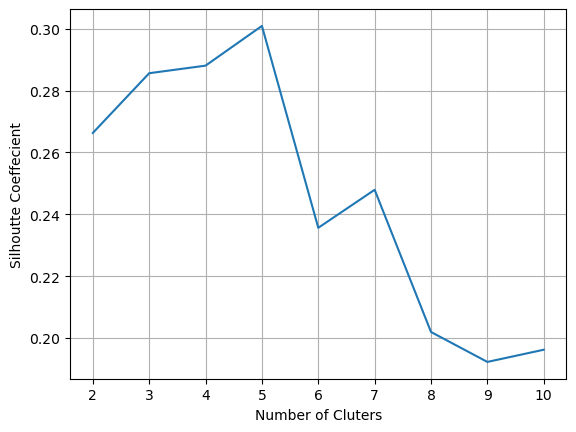

In [18]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.grid(True)
plt.show()

If your goal is to summarize and decide funding strategy:
→ Stick with 4 clusters. It’s interpretable, stable, and aligns with your current pair plot and report.

If your goal is data precision or subgroup targeting (e.g., separate strategies for 5 levels of development):

***

## Discussion Clustering Outcomes

### Q1. Why did we choose **K=4** clusters when the Elbow and Silhouette methods suggested **K=5**?

**Answer:**  
Both the Elbow and Silhouette methods act as **guidelines**, not strict mathematical rules.  
They help identify a *range* of meaningful cluster numbers — but the final choice should balance **interpretability** and **practical sense**.  

In this case:
- Both 4 and 5 gave good performance, but the difference was **small**.  
- 4 clusters aligned better with real-world categories — **Underdeveloped**, **Developing**, **Emerging**, and **Developed**.  
- Choosing 4 kept the interpretation simple and actionable for HELP International.

> *When two K values perform similarly, always prefer the one that’s more interpretable and domain-relevant.*

---

### Q2. If different students run K-Means++ without setting a random seed, will the clusters differ?

**Answer:**  
Yes, slightly — because K-Means++ involves **random initialization** of centroids.  
Without a fixed `random_state`, the algorithm may converge to **different local minima**, changing how borderline countries are grouped.

However, this **doesn’t mean K-Means fails** — it’s just a reflection of how **continuous** and **overlapping** socio-economic data can be.

> 💡 Even if some borderline countries move between clusters, the **overall structure remains stable** — rich, middle-income, and poor nations still form clear groups.

---

### Q3. Does that mean K-Means is unreliable for socio-economic data?

**Answer:**  
Not unreliable — just **limited**.  
K-Means works best when:
- Clusters are **well-separated and roughly spherical**.  
- Variance within each cluster is **similar**.

Socio-economic data, however:
- Has **continuous transitions** between categories (e.g., “developing” to “developed”).  
- Contains **non-spherical** and overlapping patterns.  

So, K-Means can capture broad patterns, but not rigid boundaries — and that’s completely fine for **analytical purposes**.

---

### Q4. How can we make the clustering more stable or consistent?

**Answer:**
You can reduce randomness and improve reliability by:
1. **Setting a random seed:**
   ```python
   KMeans(n_clusters=4, init='k-means++', random_state=42)

***

## 🧩 Final Takeaway

After applying **K-Means clustering** on the dataset with features  
`['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']`,  
the countries were categorized based on **economic performance**, **health conditions**, and **social well-being** indicators.  
This clustering helps **HELP International** strategically identify **nations most in need of financial support**.

---

### 🔍 Interpretation of Clusters

| **Color** | **Typical Pattern** | **Likely Group** |
|:-----------|:--------------------|:-----------------|
| 🟦 **Blue** | Very high GDP and income, very low child mortality and fertility, high life expectancy | **Highly Developed Countries** |
| 🟣 **Purple** | Moderate income, improving health, moderate life expectancy, declining child mortality | **Developing Countries** |
| 🟩 **Green** | Low GDP, high fertility and child mortality, low life expectancy | **Underdeveloped Countries** |
| 🟡 **Yellow** | Economically improving nations showing mixed indicators (e.g., growing GDP but still moderate mortality) | **Emerging / Transition Economies** |

---

### 🧠 Conclusion

The **K-Means algorithm** effectively grouped countries into **distinct development tiers**, aligning well with real-world socio-economic patterns.  
From the pair plots, it is evident that **`gdpp`**, **`income`**, **`life_expec`**, and **`child_mort`** are the **key drivers of clustering**, showing clear inverse or positive relationships across clusters.  
This analysis provides a **data-driven framework** for HELP International to **prioritize funding** toward the **underdeveloped nations (green cluster)**, where investment can create the most meaningful impact.
